In [1]:
import scanpy as sc
import loompy
import scvelo as scv
import numpy as np
import anndata as ad

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization



In [3]:
cd '/Users/derekebowman/Coding Projects/PVAT_Paper_Sept_5_scVelo_CellOracle/Final/scVelo'

/Users/derekebowman/Coding Projects/PVAT_Paper_Sept_5_scVelo_CellOracle/Final/scVelo


### Loading loom files

In [4]:
# Female rats. Includes all cell types, not just brown adipocytes.

ldata_8W_Control_Female = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/Control_Female_8W.loom', cache=False)

ldata_8W_HF_Female = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/HF_Female_8W.loom', cache=False)


ldata_24W_Control_Female = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/Control_Female_24W.loom', cache=False)

ldata_24W_HF_Female = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/HF_Female_24W.loom', cache=False)

In [5]:
# Male rats. Includes all cell types, not just brown adipocytes.


ldata_8W_Control_Male = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/Control_Male_8W.loom', cache=False)

ldata_8W_HF_Male = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/HF_Male_8W.loom', cache=False)

ldata_24W_Control_Male = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/Control_Male_24W.loom', cache=False)

ldata_24W_HF_Male = scv.read('/Users/derekebowman/Coding Projects/PVAT_Paper_August_27_scVelo_CellOracle/scVelo_August_27/Loom_Files/HF_Male_24W.loom', cache=False)

In [6]:
adata = sc.read('/Users/derekebowman/Coding Projects/scVelo/taPVAT_combined_annotated_with_immune_fibro_ecs_all_genes_unnormalized.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 71813 × 20743
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts', 'raw_counts', 'soupX_counts'

### Merge sequencing data (adata) and loom data (ldata) together independently to avoid merging issues.

In [8]:
adata_8W_Control_Females = scv.utils.merge(adata, ldata_8W_Control_Female)
adata_8W_HF_Females = scv.utils.merge(adata, ldata_8W_HF_Female)
adata_24W_Control_Females = scv.utils.merge(adata, ldata_24W_Control_Female)
adata_24W_HF_Females = scv.utils.merge(adata, ldata_24W_HF_Female)

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [9]:
adata_8W_Control_Males = scv.utils.merge(adata, ldata_8W_Control_Male)
adata_8W_HF_Males = scv.utils.merge(adata, ldata_8W_HF_Male)
adata_24W_Control_Males = scv.utils.merge(adata, ldata_24W_Control_Male)
adata_24W_HF_Males = scv.utils.merge(adata, ldata_24W_HF_Male)

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [10]:
# Merge the data together

adata = ad.concat([adata_8W_Control_Males, adata_8W_HF_Males , adata_24W_Control_Males, adata_24W_HF_Males,
                   adata_8W_Control_Females, adata_8W_HF_Females, adata_24W_Control_Females, adata_24W_HF_Females], join='outer')

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [11]:
adata = adata[adata.obs['celltype'] == 'Adipocytes_Brown'] # Select only brown adipocytes


In [12]:
adata

View of AnnData object with n_obs × n_vars = 40185 × 20743
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    layers: 'counts', 'raw_counts', 'soupX_counts', 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [13]:
adata = adata[~((adata.obs['time'] == '24W') & (adata.obs['diet'] == 'HF'))] # Removing 24W HF (i.e. keeping everything except 24W HF)

In [14]:
def TimeDiet(row):
    if row['time'] == '8W' and row['diet'] == 'Control':
        return '8W_Control'
    elif row['time'] == '8W' and row['diet'] == 'HF':
        return '8W_HF'
    elif row['time'] == '24W' and row['diet'] == 'HF':
        return '24W_HF'
    else:
        return '24W_Control'



In [15]:

adata.obs['time_diet'] = adata.obs.apply(TimeDiet, axis=1)

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [16]:
adata.obs['time_diet'].value_counts()

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


time_diet
8W_HF          12015
24W_Control    11282
8W_Control      6953
Name: count, dtype: int64

In [17]:
adata.obs[adata.obs['time_diet'] == 'Error']

Empty DataFrame
Columns: [sample_id, n_genes_by_counts, log1p_n_genes_by_counts, total_counts, log1p_total_counts, pct_counts_in_top_20_genes, total_counts_mt, log1p_total_counts_mt, pct_counts_mt, total_counts_ribo, log1p_total_counts_ribo, pct_counts_ribo, total_counts_hb, log1p_total_counts_hb, pct_counts_hb, outlier, mt_outlier, n_genes, scDblFinder_score, scDblFinder_class, Sample, tissue, diet, time, sex, batch, sample_type, rat_id, weight_3W, weight_10W, weight_17W, weight_24W, MAP_7W, systolic_bp_7W, MAP_9W, systolic_bp_9W, MAP_16W, systolic_bp_16W, MAP_24W, systolic_bp_24W, doublet, celltype, celltype_broad, sample_batch, initial_size_unspliced, initial_size_spliced, initial_size, time_diet]
Index: []

[0 rows x 48 columns]

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [18]:
# def TimeDietSex(row):
#     if row['sex'] == 'M' and row['time_diet'] == '8W_Control':
#         return '8W_Control_Male'
    
#     elif row['sex'] == 'M' and row['time_diet'] == '8W_HF':
#         return '8W_HF_Male'
    
#     elif row['sex'] == 'M' and row['time_diet'] == '24W_HF':
#         return '24W_HF_Male'
    
#     elif row['sex'] == 'F' and row['time_diet'] == '8W_Control':
#         return '8W_Control_Female'
    
#     elif row['sex'] == 'F' and row['time_diet'] == '8W_HF':
#         return '8W_HF_Female'
    
#     elif row['sex'] == 'F' and row['time_diet'] == '24W_HF':
#         return '24W_HF_Female'   

#     else:
#         return 'Error'
    
#     adata.obs['time_diet_sex'] = adata.obs.apply(TimeDietSex, axis=1)


# Preprocess
 https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

 https://scvelo.readthedocs.io/en/stable/getting_started.html

In [19]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 9533 genes that are detected 20 counts (shared).


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Normalized count data: X, spliced, unspliced.


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Extracted 2000 highly variable genes.
Logarithmized X.


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


computing moments based on connectivities


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [20]:
sc.tl.diffmap(adata)

In [21]:
adata

AnnData object with n_obs × n_vars = 30250 × 2000
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'time_diet', 'n_counts'
    var: 'n_cells', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'log1p', 'pca', 'neighbors', 'diffmap_ev

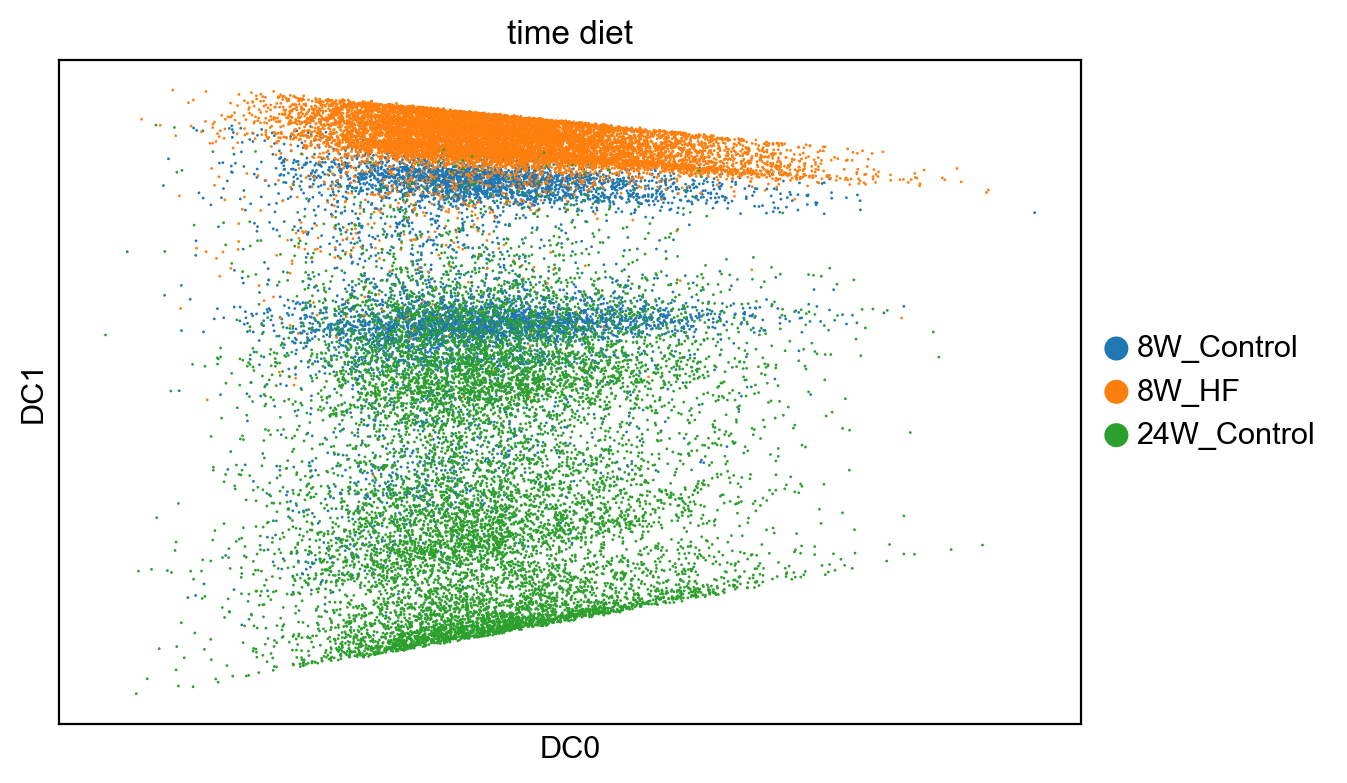

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


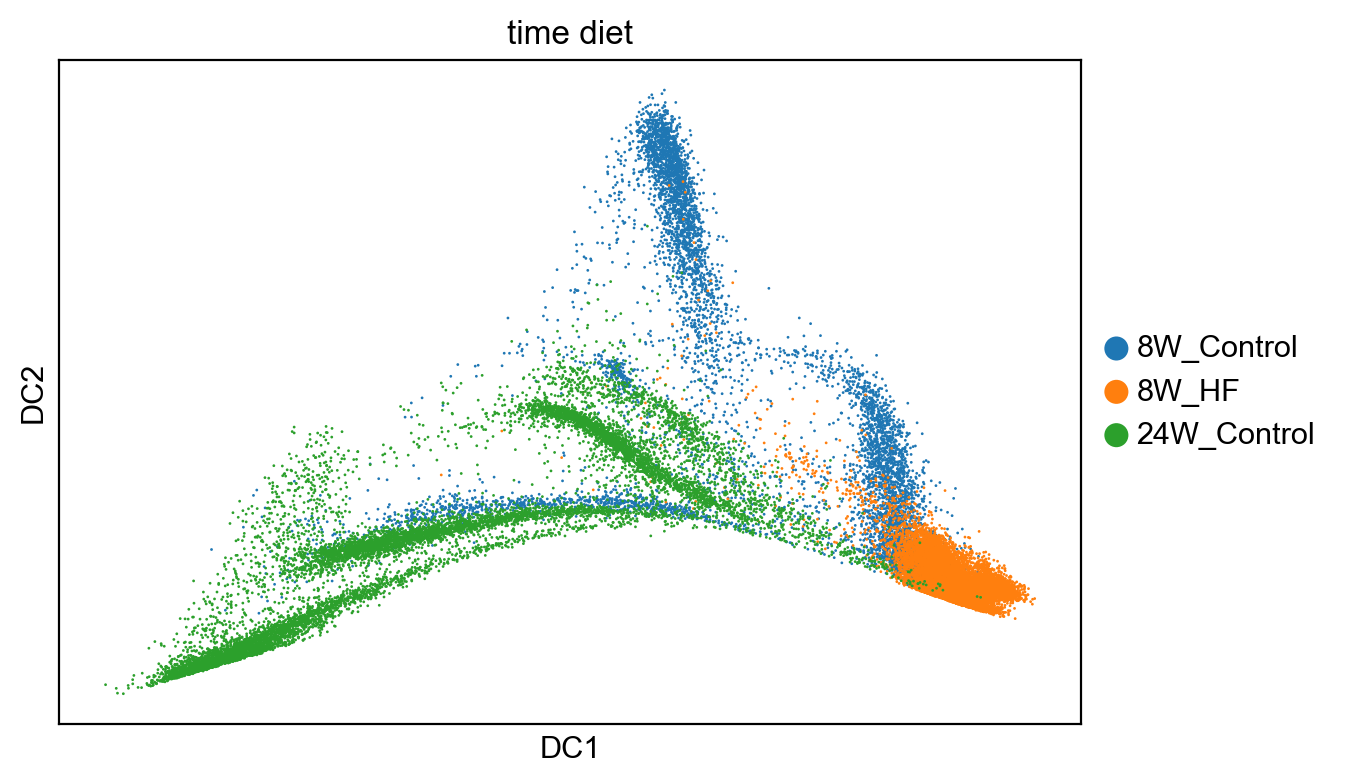

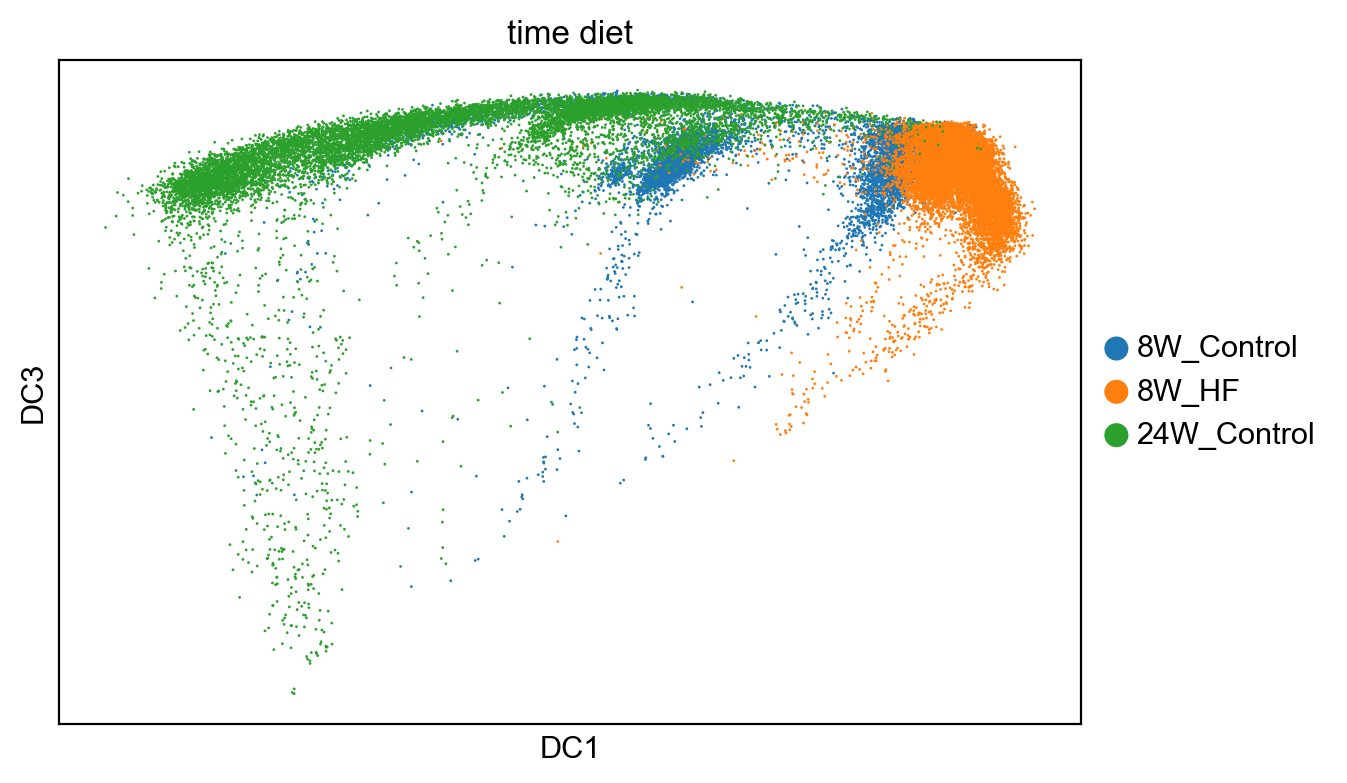

In [22]:
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=["time_diet"],
    components=[0, 1],
)
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=["time_diet"],
    components=[1, 2],
)
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=["time_diet"],
    components=[1, 3],
    
)

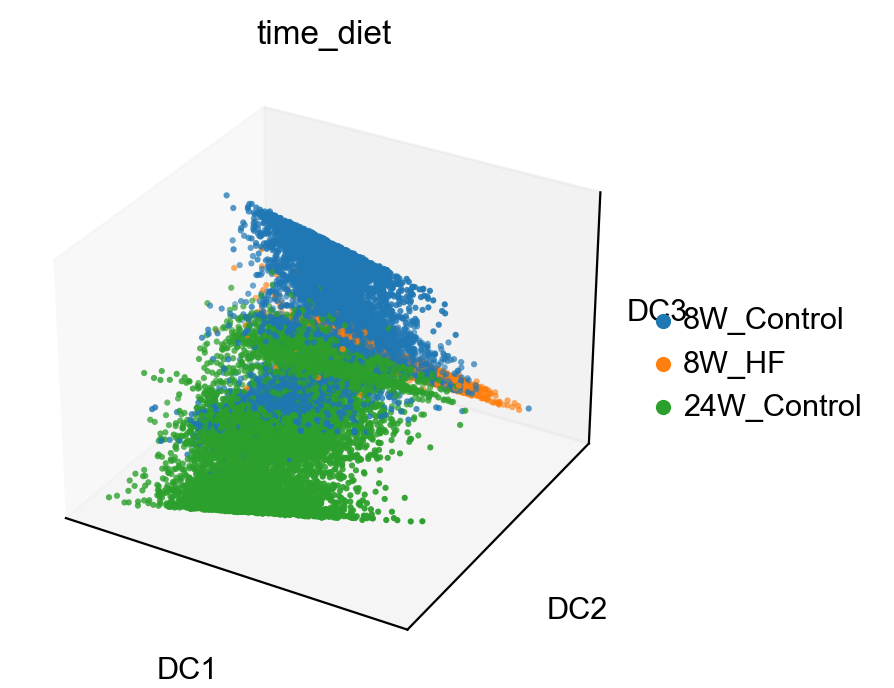

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [23]:
sc.pl.diffmap(adata, color = 'time_diet', projection = '3d')

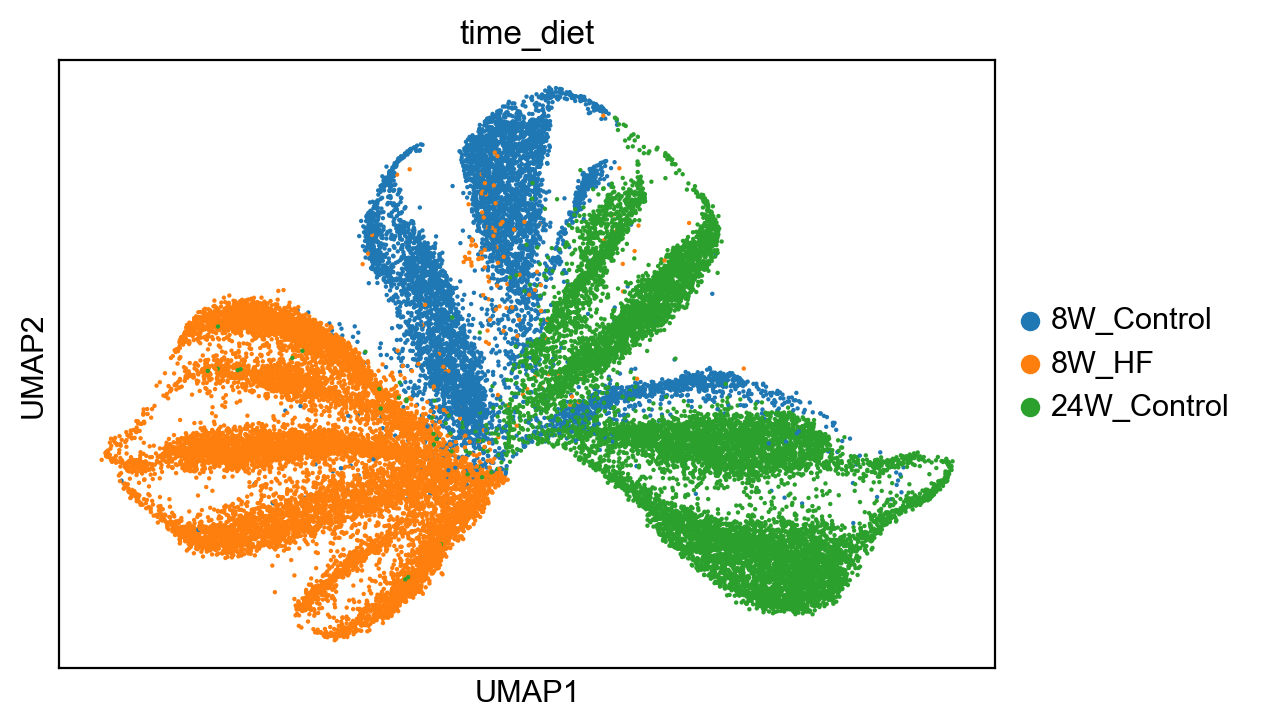

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [24]:
scv.tl.umap(adata)
sc.pl.umap(adata, color=["time_diet"], size=10)

In [25]:

from tqdm.notebook import tqdm

In [26]:

scv.tl.recover_dynamics(adata, n_jobs=-1) # n_jobs = -1 means that all available cores will be used

recovering dynamics (using 10/10 cores)
False
False
False
False


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


  0%|          | 0/336 [00:00<?, ?gene/s]

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=56949) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()


FalseFalse

False
False
False
False
FalseFalse

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [27]:
# mode = 'dynamical' using the likelihood-based dynamical model [Bergen et al., 2020] solves the full splicing kinetics 
# and generalizes RNA velocity estimation to transient systems. 
# It is also capable of capturing non-observed steady states.

# scv.tl.recover_dynamics must be run first
scv.tl.velocity(adata, mode='dynamical', groupby='time_diet')

computing velocities
False
False
False
False


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(dat

    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [28]:
scv.tl.velocity_graph(adata, n_jobs = -1)

computing velocity graph (using 10/10 cores)


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


  0%|          | 0/30250 [00:00<?, ?cells/s]

    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_diffmap', embedded velocity vectors (adata.obsm)


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


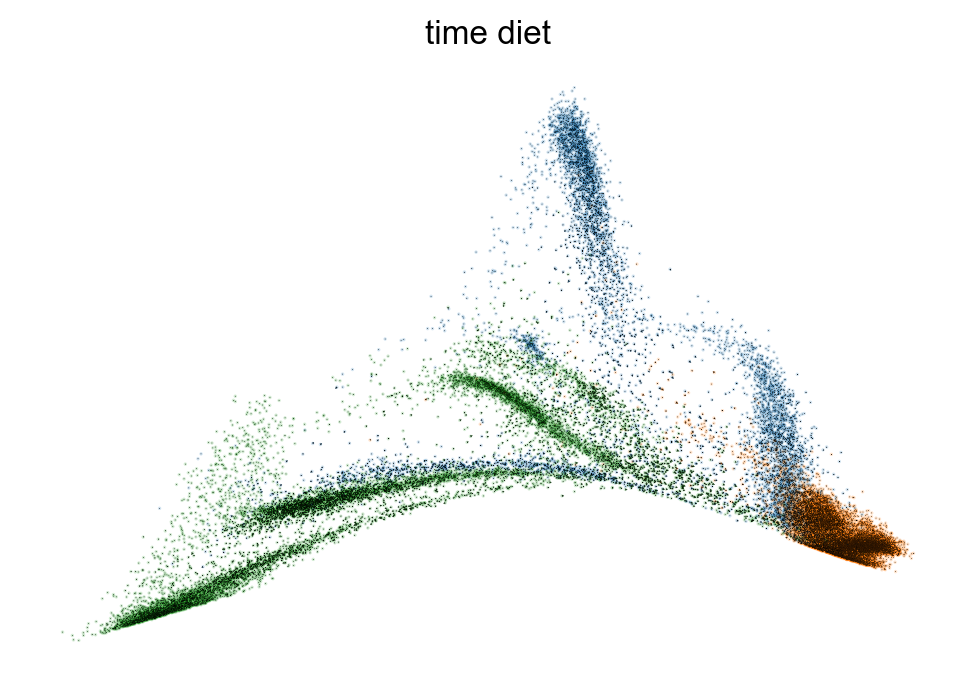

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


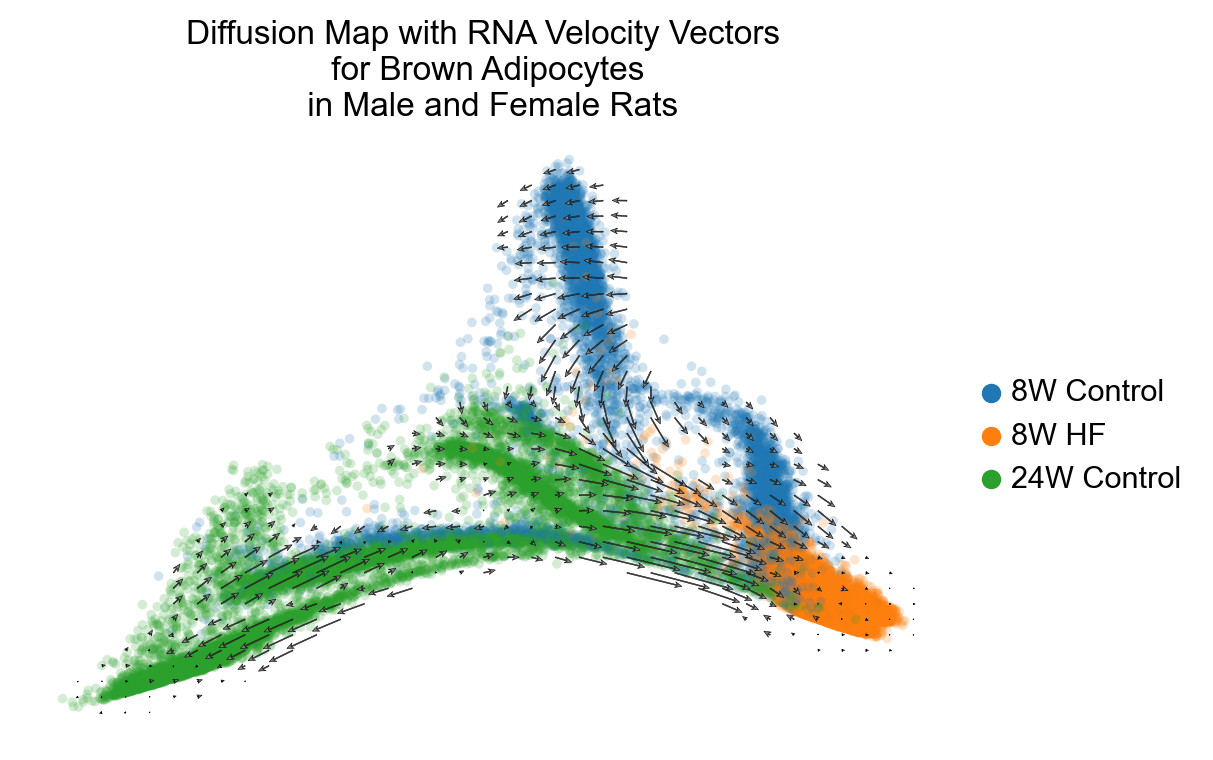

In [29]:
scv.pl.velocity_embedding(adata, basis='diffmap', color = 'time_diet',)

scv.pl.velocity_embedding_grid(adata, basis='diffmap', color = 'time_diet', arrow_length=2, arrow_size = 1.25, min_mass= 10, smooth=1,
                               density=0.75, legend_loc = 'right margin',
                               title='Diffusion Map with RNA Velocity Vectors \n for Brown Adipocytes \n in Male and Female Rats')

# scv.pl.velocity_embedding_stream(adata, basis='diffmap', color = ['time_diet'], 
#                                  legend_loc='right margin', title= '8W_Control, 8W_HF, 24W_HF Male and Female Rats Brown Adipocytes',
#                                  arrow_size = 0.5, max_length = 1, size = 50, density= 2,
#                                  ncols=1)

# scv.pl.velocity_embedding_stream(adata, basis='umap', color = ['time_diet'], 
#                                  legend_loc='right margin', title= '8W_Control, 8W_HF, 24W_HF Male and Female Rats Brown Adipocytes',
#                                  arrow_size = 1, max_length = 4, ncols= 1)






# Starting Kinetic Rate Parameters 
### https://scvelo.readthedocs.io/en/stable/DynamicalModeling.html

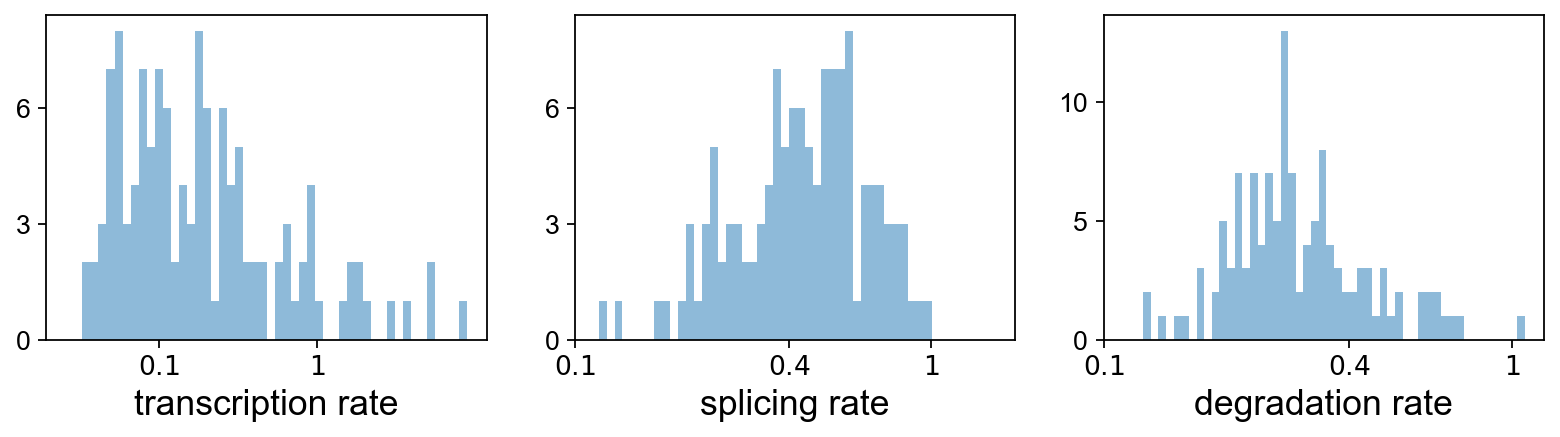

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


fit_r2  fit_alpha  fit_beta  fit_gamma     fit_t_  \
AABR07028615.1  0.051109   0.061472  0.062914   0.177883   6.546258   
Aacs            0.099904   0.052033  0.111591   0.213574  13.675689   
Abca8a          0.518920   0.175706  0.261010   0.275059   9.621800   
Abca9           0.154040   0.091461  0.423049   0.285430   4.022951   
Abcb11          0.409849   0.053036  0.165168   0.272865   8.813686   

                fit_scaling  fit_std_u  fit_std_s  fit_likelihood  fit_u0  \
AABR07028615.1     8.093547   0.378885   0.046813    3.591955e-29     0.0   
Aacs               3.921813   0.176926   0.057106    2.451969e-01     0.0   
Abca8a             1.624724   0.175535   0.145583    1.128802e-01     0.0   
Abca9              1.684824   0.069428   0.048076    1.081651e-19     0.0   
Abcb11             2.894294   0.119453   0.045502    1.486465e-01     0.0   

                fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  \
AABR07028615.1     0.0         0.396079      1.067189      0.177971   
Aacs               0.0         0.120523      0.469210      0.160223   
Abca8a             0.0         0.472489      0.687847      0.571718   
Abca9              0.0         0.300513      0.208729      0.156088   
Abcb11             0.0         0.335489      0.396048      0.145316   

                fit_variance  fit_alignment_scaling  
AABR07028615.1      1.711843               1.963887  
Aacs                0.889920               2.754684  
Abca8a              2.313543               2.723613  
Abca9               1.312665               1.636823  
Abcb11              2.031581               2.251358

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [30]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

# Starting Latent Time 
### https://scvelo.readthedocs.io/en/stable/DynamicalModeling.html

computing terminal states
T_roots shape: (30250, 30250)
T_roots (sample): <Compressed Sparse Row sparse matrix of dtype 'float32'
	with 4 stored elements and shape (5, 5)>
  Coords	Values
  (1, 4)	9.222469088854268e-06
  (1, 3)	0.0008857447537593544
  (4, 3)	0.0005814896430820227
  (4, 1)	0.0034184486139565706
Eigenvectors_roots (first): [0.1417924492 0.0815084079 0.101623008  0.0197621817 0.0442553446]
Eigenvectors_roots (second): [0.000481828  0.0103929511 0.0126905087 0.0024205571 0.0023553758]
Roots: [0.2466505887 0.0451971353 0.0739566368 ... 3.5856740156 0.8396868165
 3.258679485 ]
Roots_after_scale: [0.2060084427 0.0344047143 0.0589028681 ... 1.           0.7111734129
 1.          ]
Roots_after_verify_roots: [0.2060084427 0.0344047143 0.0589028681 ... 1.           0.7111734129
 1.          ]
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', en

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


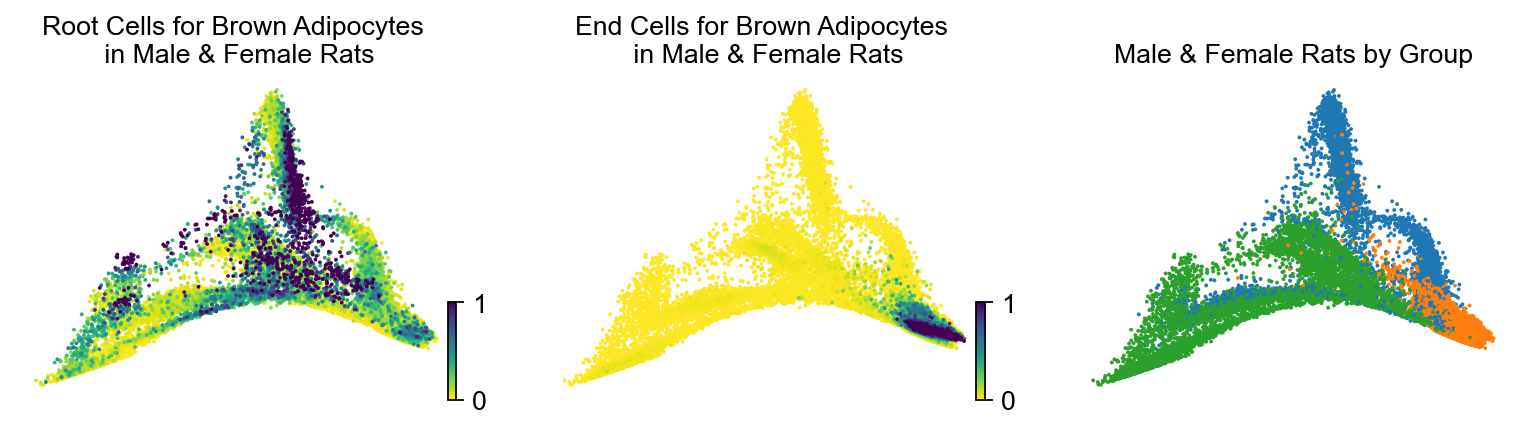

In [31]:
scv.tl.terminal_states(adata)
scv.pl.scatter(adata, color=["root_cells", "end_points",'time_diet'], basis = 'diffmap', title=['Root Cells for Brown Adipocytes \n in Male & Female Rats', 'End Cells for Brown Adipocytes \n in Male & Female Rats','Male & Female Rats by Group'])

In [32]:
adata.obs

sample_id  n_genes_by_counts  log1p_n_genes_by_counts  \
AAAGAACCAAAT  P_CTRL_8W_M_01                899                 6.802395   
AAAGAACGTTCG  P_CTRL_8W_M_01               1999                 7.600902   
AAAGGATGTACA  P_CTRL_8W_M_01                527                 6.269096   
AAAGGTACAATC  P_CTRL_8W_M_01               1759                 7.473069   
AAAGTGAGTGGC  P_CTRL_8W_M_01               1759                 7.473069   
...                      ...                ...                      ...   
TGGAGAGCATCA    P_HF_8W_F_03               1492                 7.308543   
TGGGAGAGTACT    P_HF_8W_F_03               1863                 7.530480   
TTCGCTGAGGAG    P_HF_8W_F_03               2363                 7.768110   
TTCTAGTCACTA    P_HF_8W_F_03               2216                 7.703910   
TTTCGATAGCAC    P_HF_8W_F_03               2487                 7.819234   

              total_counts  log1p_total_counts  pct_counts_in_top_20_genes  \
AAAGAACCAAAT        1346.0            7.205635                   11.589896   
AAAGAACGTTCG        4236.0            8.351611                    9.560907   
AAAGGATGTACA         698.0            6.549651                   15.042980   
AAAGGTACAATC        3288.0            8.098339                   10.523114   
AAAGTGAGTGGC        3379.0            8.125631                   10.298905   
...                    ...                 ...                         ...   
TGGAGAGCATCA        2290.0            7.736744                    8.646288   
TGGGAGAGTACT        3382.0            8.126518                    8.249556   
TTCGCTGAGGAG        5582.0            8.627482                   10.229308   
TTCTAGTCACTA        4860.0            8.488999                    9.917695   
TTTCGATAGCAC        5935.0            8.688791                    9.048020   

              total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAAGAACCAAAT             11.0               2.484907       0.817236   
AAAGAACGTTCG             14.0               2.708050       0.330500   
AAAGGATGTACA             17.0               2.890372       2.435530   
AAAGGTACAATC             13.0               2.639057       0.395377   
AAAGTGAGTGGC             10.0               2.397895       0.295946   
...                       ...                    ...            ...   
TGGAGAGCATCA              3.0               1.386294       0.131004   
TGGGAGAGTACT              9.0               2.302585       0.266115   
TTCGCTGAGGAG              8.0               2.197225       0.143318   
TTCTAGTCACTA              7.0               2.079442       0.144033   
TTTCGATAGCAC             10.0               2.397895       0.168492   

              total_counts_ribo  ...  celltype_broad  sample_batch  \
AAAGAACCAAAT                6.0  ...      Adipocytes      GCTC-1-0   
AAAGAACGTTCG               12.0  ...      Adipocytes      AACT-1-0   
AAAGGATGTACA                1.0  ...      Adipocytes      AGTA-1-0   
AAAGGTACAATC                9.0  ...      Adipocytes      ACGT-1-0   
AAAGTGAGTGGC               13.0  ...      Adipocytes      TAGA-1-0   
...                         ...  ...             ...           ...   
TGGAGAGCATCA               12.0  ...      Adipocytes     GTGT-1-24   
TGGGAGAGTACT                5.0  ...      Adipocytes     GGGA-1-24   
TTCGCTGAGGAG               14.0  ...      Adipocytes     GGTG-1-24   
TTCTAGTCACTA               18.0  ...      Adipocytes     CACA-1-24   
TTTCGATAGCAC                9.0  ...      Adipocytes     TAAA-1-24   

              initial_size_unspliced  initial_size_spliced  initial_size  \
AAAGAACCAAAT                     855                   443         443.0   
AAAGAACGTTCG                    3116                  1026        1026.0   
AAAGGATGTACA                     393                   264         264.0   
AAAGGTACAATC                    2666                   545         545.0   
AAAGTGAGTGGC                    2430                   885         885.0   
...                

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


computing latent time using root_cells, end_points as prior


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


    finished (0:00:04) --> added 
    'latent_time', shared time (adata.obs)


/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


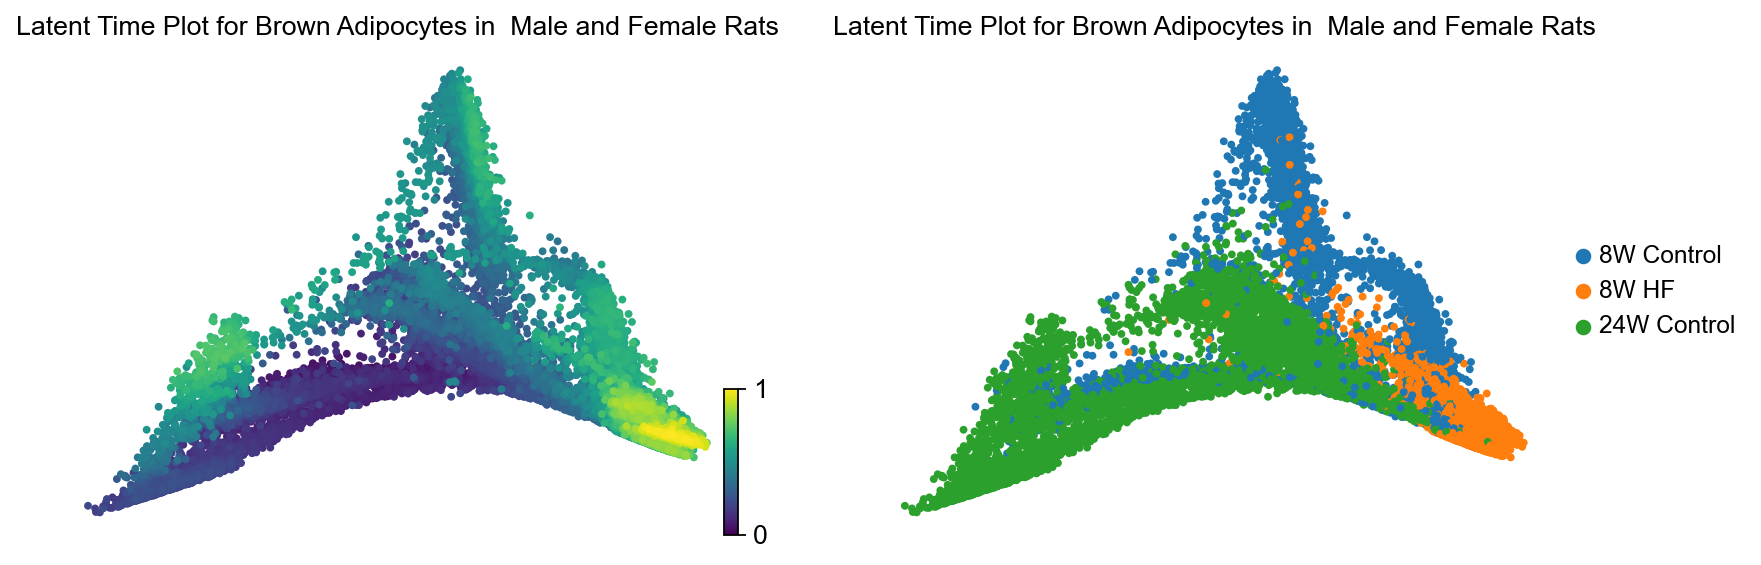

In [33]:
scv.tl.latent_time(adata, end_key='end_points', root_key='root_cells')
scv.pl.scatter(adata, color=['latent_time','time_diet'], color_map='viridis', size=50, legend_loc='right margin',basis = 'diffmap', title='Latent Time Plot for Brown Adipocytes in  Male and Female Rats')
# scv.pl.umap(adata, color=['latent_time','time_diet'], color_map='viridis', size=50, legend_loc ='right_margin')



/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/Us

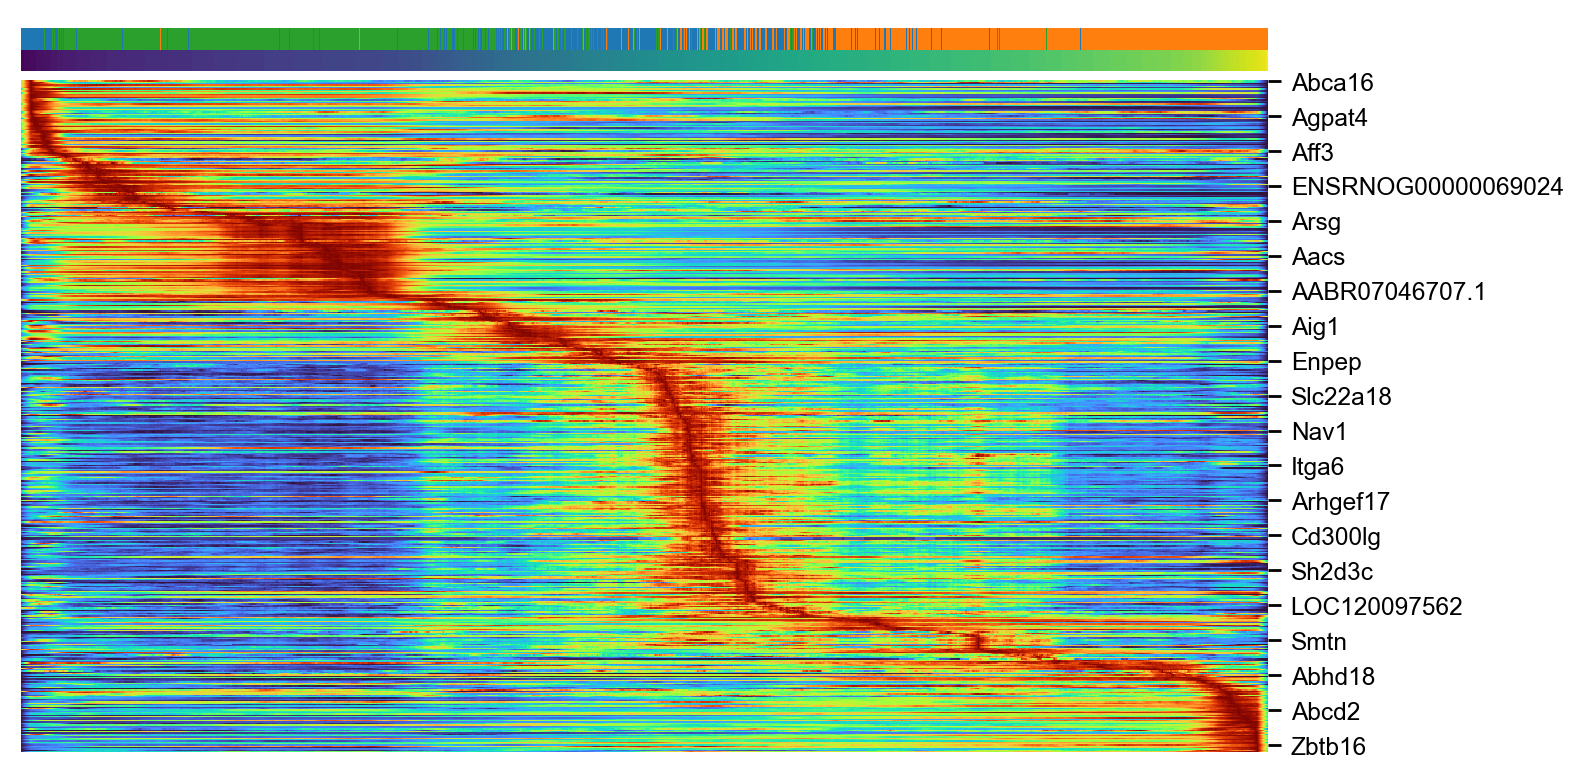

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [34]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[0:500]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color=['time_diet','latent_time'], n_convolve=500, context='paper', colorbar=True, color_map='turbo')



/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.u

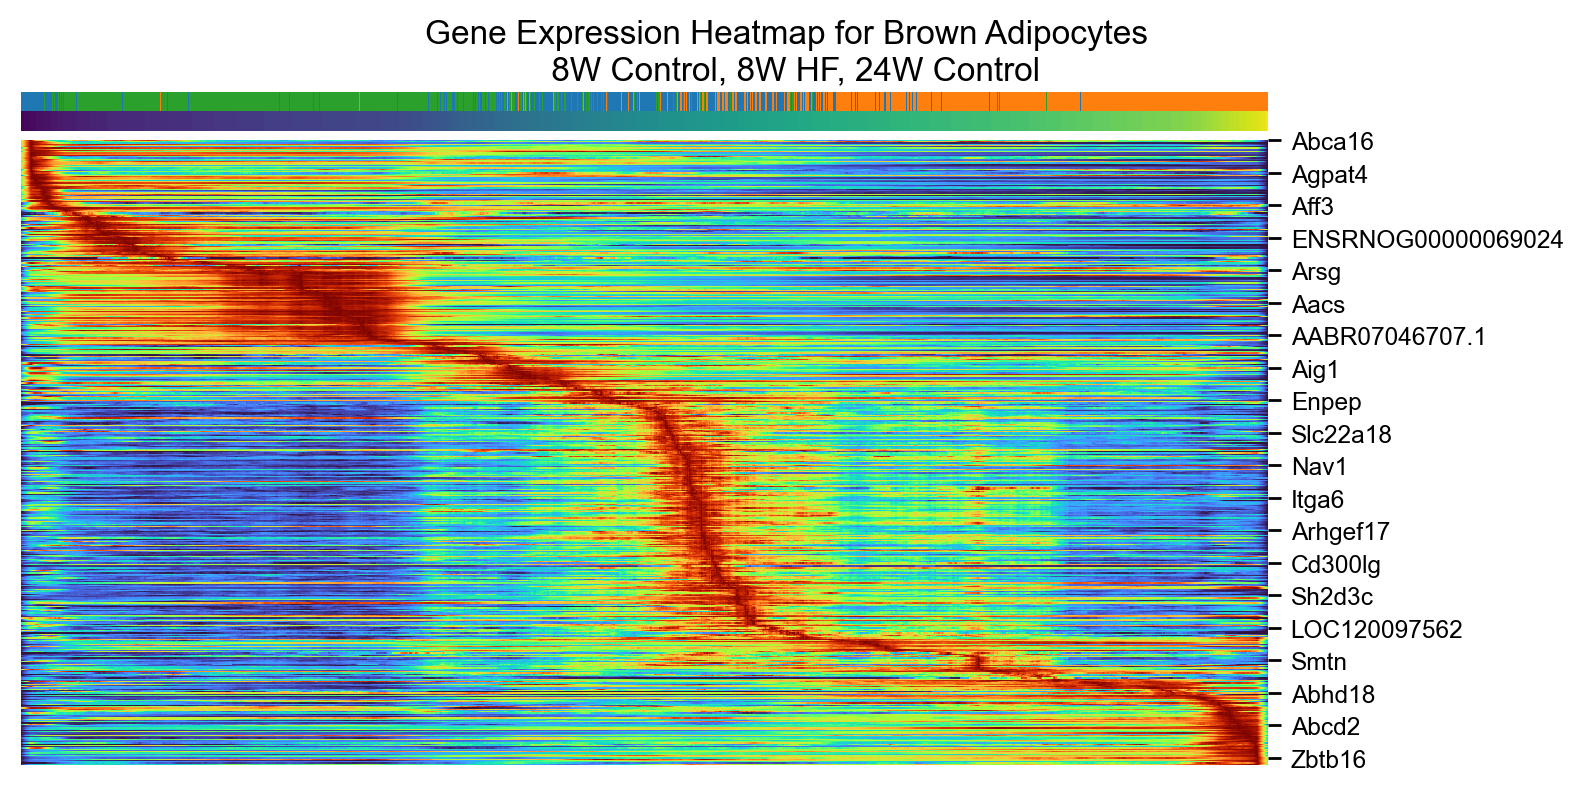

/Users/derekebowman/miniconda3/envs/scVelo/lib/python3.12/site-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [36]:
import matplotlib.pyplot as plt
# Generate the heatmap and store the output
heatmap = scv.pl.heatmap(
    adata,
    var_names=top_genes,
    sortby='latent_time',
    col_color=['time_diet', 'latent_time'],
    n_convolve=500,
    context='paper',
    colorbar=True,
    color_map='turbo',
    show=False  # Prevent it from displaying immediately
)
 
plt.subplots_adjust(top=0.9)
plt.suptitle('Gene Expression Heatmap for Brown Adipocytes \n 8W Control, 8W HF, 24W Control', fontsize=12, )
# Adjust the layout to add space at the top
#plt.subplots_adjust(top=1.5)  # Adjust the top margin (0.5 can be modified as needed)
 
# Set the title with additional space
#plt.suptitle("Gene Expression Heatmap for Brown Adipocytes", fontsize=12)

# Display the heatmap with the title
plt.show()
 